# Análisis del Desempeño Agrícola 2006-2023 en los Departamentos de Bolívar y Córdoba: Un Enfoque Basado en CRISP-DM para Evaluar Área Sembrada, Área Cosechada, Producción y Rendimiento

El rendimiento agrícola es un indicador clave para evaluar la eficiencia y la sostenibilidad de la producción en el sector rural. Las fluctuaciones en el rendimiento no solo afectan la productividad, sino también el bienestar de las comunidades rurales, la estabilidad de los ingresos y, en última instancia, la seguridad alimentaria en toda las regiones.

Con el objetivo de contribuir a la solución de los desafíos que surgen en el desarrollo de las misiones impulsadas por el Gobierno Nacional, especialmente aquellas relacionadas con la bioeconomía, los ecosistemas naturales, los territorios sostenibles y el derecho a la alimentación. Este análisis busca identificar patrones y tendencias dentro de los datos disponibles. Con el fin de facilitar la toma de decisiones en cuanto a políticas públicas agrícolas, inversiones en infraestructura y estrategias para mejorar la productividad en los próximos años.

## Objetivos

### Objetivo general
Analizar el Desempeño Agrícola en los Departamentos de Bolívar y Córdoba para el periodo 2006-2023

### Objetivos específicos
- Identificar patrones y tendencias que permitan orientar las decisiones de políticas públicas.
- Identificar diferencias en la producción agrícola para proponer soluciones específicas.
- Generar recomendaciones basadas en datos para mejorar las prácticas agrícolas.

## Importación de librerías y carga de datos

In [107]:
import pandas as pd

df = pd.read_csv(r'C:\Users\EMMY\Desktop\Proyecto\Limpieza\data.csv')
df.head(2)

,codigo_dane_departamento,departamento,codigo_dane_municipio,municipio,grupo_cultivo,subgrupo,cultivo,desagregacion_cultivo,año,periodo,area_sembrada,area_cosechada,produccion,rendimiento,ciclo_cultivo,subregion
0,13,Bolívar,13006,Achí,Frutales,Aguacate,Aguacate,Aguacate,2007,2007,80.0,80.0,800.0,10.0,Permanente,Mojana Bolivarense
1,13,Bolívar,13006,Achí,Frutales,Aguacate,Aguacate,Aguacate,2008,2008,80.0,80.0,720.0,9.0,Permanente,Mojana Bolivarense



## Variables 
- Cuantitativas: 
    - Área sembrada (hectáreas)
    - Área cosechada (hectáreas)
    - Producción (toneladas)
    - Rendimiento (toneladas/hectáreas)

- Cualitativas: 
    - Departamento 
    - Municipio 
    - Grupo cultivo 
    - Subgrupo 
    - Cultivo 
    - Año 
    - Ciclo del cultivo 
    - Subregion

**Periodo:** 2006 - 2023

## Tratamiento de datos faltantes

- **Registros iniciales:** 16354


Durante la exploración inicial de la base de datos, se identificaron 262 registros con valores faltantes (NaN) en la variable ‘Rendimiento’. Al investigar estos casos más a fondo, se observó que las variables asociadas, como ‘Área cosechada’ y ‘Producción’, también presentaban valores iguales a cero en todos esos registros. Para mantener la consistencia en los datos y evitar introducir sesgos al análisis posterior, se decidió reemplazar los valores faltantes en la variable ‘Rendimiento’ por cero.


Por otro lado, se identificaron 627 registros en los que AREA SEMBRADA (HA) < AREA COSECHADA(HA), lo cual no tiene sentito. Por este motivo, se decidió eliminar dichos registros del análisis, quedando con un total de 15727 registros.

# Resumen estadístico de los datos

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15727 entries, 0 to 15726
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_dane_departamento  15727 non-null  int64  
 1   departamento              15727 non-null  object 
 2   codigo_dane_municipio     15727 non-null  int64  
 3   municipio                 15727 non-null  object 
 4   grupo_cultivo             15727 non-null  object 
 5   subgrupo                  15727 non-null  object 
 6   cultivo                   15727 non-null  object 
 7   desagregacion_cultivo     15727 non-null  object 
 8   año                       15727 non-null  int64  
 9   periodo                   15727 non-null  object 
 10  area_sembrada             15727 non-null  float64
 11  area_cosechada            15727 non-null  float64
 12  produccion                15727 non-null  float64
 13  rendimiento               15727 non-null  float64
 14  ciclo_

In [109]:
# Cambiar el tipo de datos de 'codigo dane departamento', 'codigo dane municipio' y 'año'
df = df.astype({'codigo_dane_departamento': 'object', 'año': 'object', 'codigo_dane_municipio': 'object'})

In [110]:
df.dtypes

codigo_dane_departamento     object
departamento                 object
codigo_dane_municipio        object
municipio                    object
grupo_cultivo                object
subgrupo                     object
cultivo                      object
desagregacion_cultivo        object
año                          object
periodo                      object
area_sembrada               float64
area_cosechada              float64
produccion                  float64
rendimiento                 float64
ciclo_cultivo                object
subregion                    object
dtype: object

In [111]:
df.describe()

,area_sembrada,area_cosechada,produccion,rendimiento
count,15727.000000,15727.000000,15727.000000,15727.000000
mean,466.856797,396.268574,2190.196082,6.412599
std,949.812460,852.309949,6438.652888,7.541657
min,0.100000,0.000000,0.000000,0.000000
25%,25.500000,18.000000,75.000000,1.500000
50%,130.000000,98.000000,390.000000,4.000000
75%,475.000000,390.000000,1560.000000,9.000000
max,11950.000000,11950.000000,156260.000000,100.470000


Se observan mínimos de 0 o cercanos a 0 para todas las variables y máximos bastante alejados del percentil 75. Esto indica una gran dispersion de los datos.
Además se obsevan medias alejadas de la mediana para todas las variables

In [112]:
df.describe(include='object')

,codigo_dane_departamento,departamento,codigo_dane_municipio,municipio,grupo_cultivo,subgrupo,cultivo,desagregacion_cultivo,año,periodo,ciclo_cultivo,subregion
count,15727,15727,15727,15727,15727,15727,15727,15727,15727,15727,15727,15727
unique,2,2,76,77,14,65,68,109,18,51,3,13
top,13,Bolívar,23001,Montería,Cereales,Maiz,Maíz,Maiz Tradicional,2021,2021A,Transitorio,Dique Bolivarense
freq,8089,8089,464,464,5243,2103,3201,1691,1254,509,9689,2547


De las variables tipo 'object' se puede observar que los valores más recurentes son los siguientes:
- Bolívar
- Dique Bolivarense 
- Montería 
- Maiz
- Transitorio
- 2021

## Gráfico básicos
### Boxplot

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
# Lista de variables a estudiar
variables = ['area_sembrada', 'area_cosechada', 'produccion', 'rendimiento']

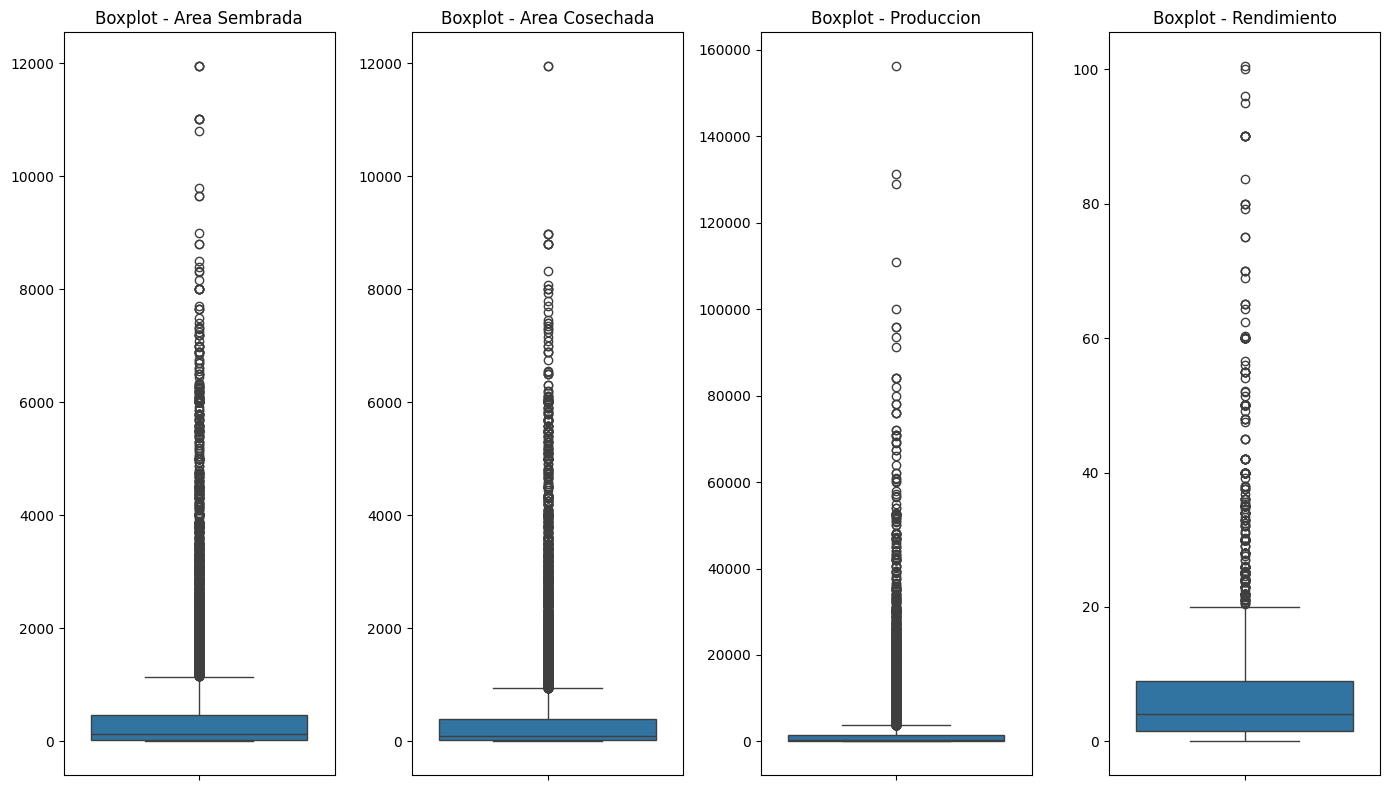

In [115]:
# Crear un bucle para generar los boxplots

fig, axes = plt.subplots(1, len(variables), figsize=(14, 8))
for idx, i in enumerate(variables):
    sns.boxplot(data=df, y=i, ax=axes[idx])  # Cambia axes[0] por axes[idx]
    axes[idx].set_title(f'Boxplot - {i.replace('_',' ').title()}')    # Ajusta el título según la variable
    axes[idx].set_ylabel('')
    

# Muestra la figura después de agregar todos los gráficos
plt.tight_layout()
plt.show()
    

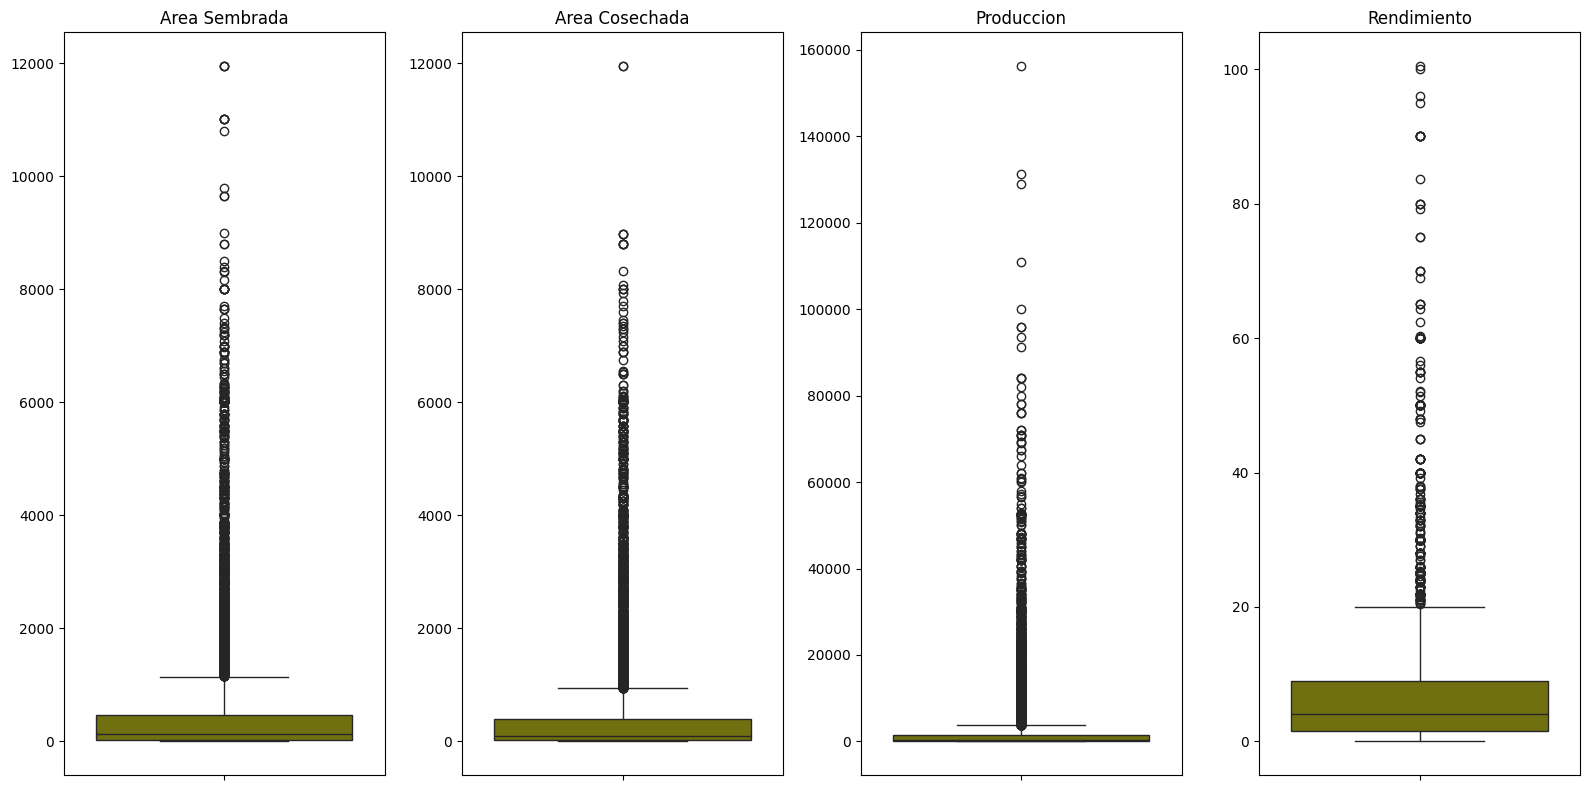

In [116]:
plt.figure(figsize=(16, 8))

# Generar un subplot para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(1, 4, i)  # Crear un subplot (1 fila, 4 columnas, índice i)
    sns.boxplot(data=df, y=var, color='olive')  # Boxplot con Seaborn
    plt.title(var.replace('_', ' ').title())  # Título del subplot
    plt.xlabel("")  # Eliminar etiqueta en el eje X para claridad
    plt.ylabel("")  # Eliminar etiqueta en el eje Y para claridad

# Ajustar diseño para evitar solapamiento
plt.tight_layout()
plt.show()

### Histograma

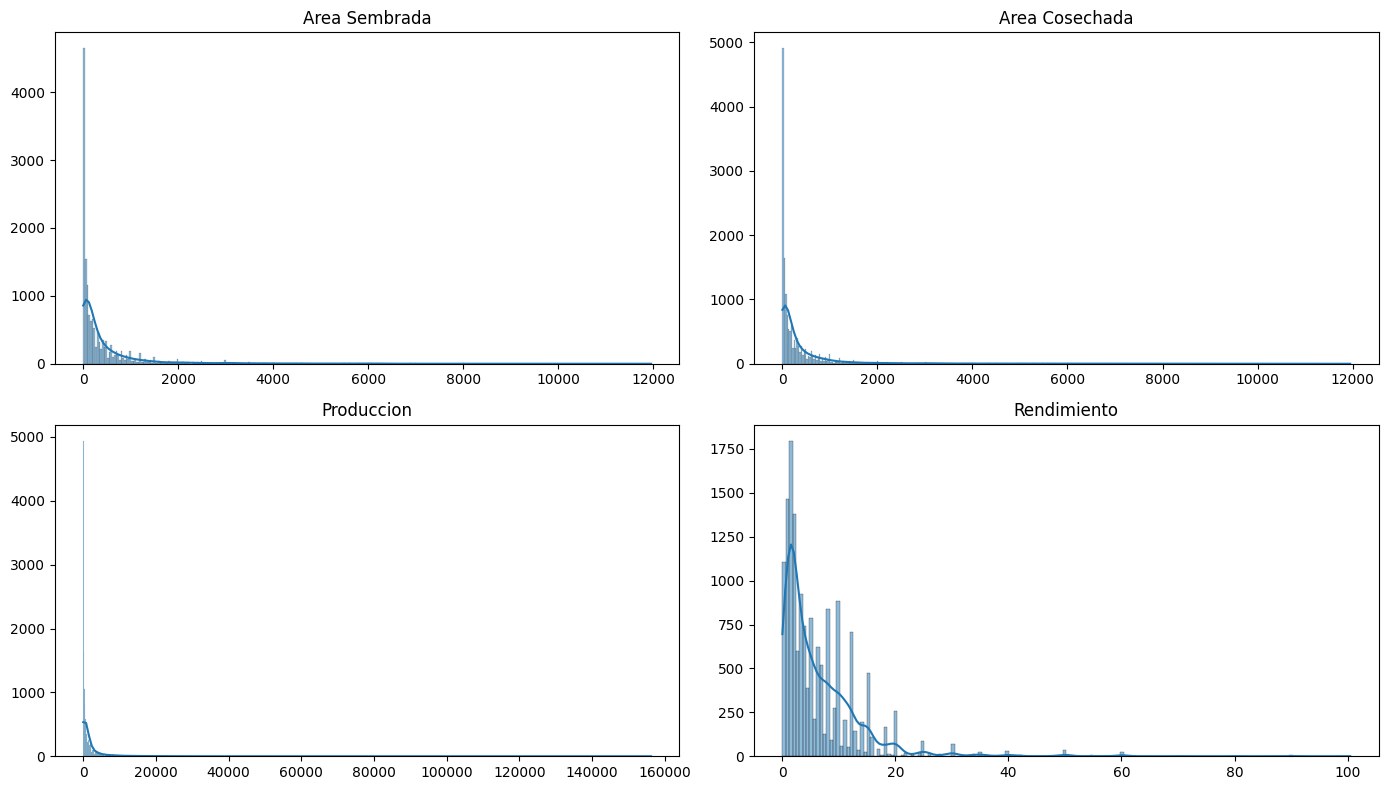

In [117]:
plt.figure(figsize=(14,8))

# Generar subplot para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x= var,kde= True)
    plt.title(var.replace('_', ' ').title())
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

### Mapa de calor

In [118]:
# DF de variables cuantitativas
qVar = df.select_dtypes(include='number')
qVar.columns = [col.replace('_', ' ').title() for col in qVar.columns]
qVar

,Area Sembrada,Area Cosechada,Produccion,Rendimiento
0,80.0,80.0,800.0,10.0
1,80.0,80.0,720.0,9.0
2,80.0,80.0,800.0,10.0
3,80.0,80.0,480.0,6.0
4,80.0,80.0,560.0,7.0
...,...,...,...,...
15722,75.0,72.0,864.0,12.0
15723,75.0,72.0,792.0,11.0
15724,85.0,65.0,780.0,12.0
15725,100.0,85.0,1020.0,12.0


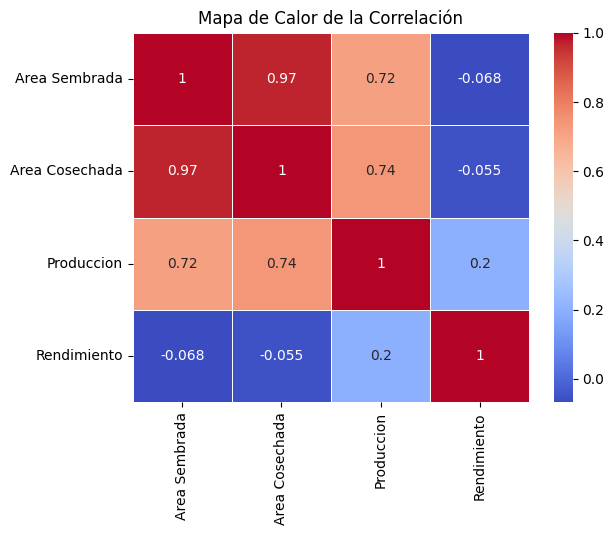

In [119]:
correlation = qVar.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación')
plt.show()

### Pairplot

<Figure size 1500x1500 with 0 Axes>

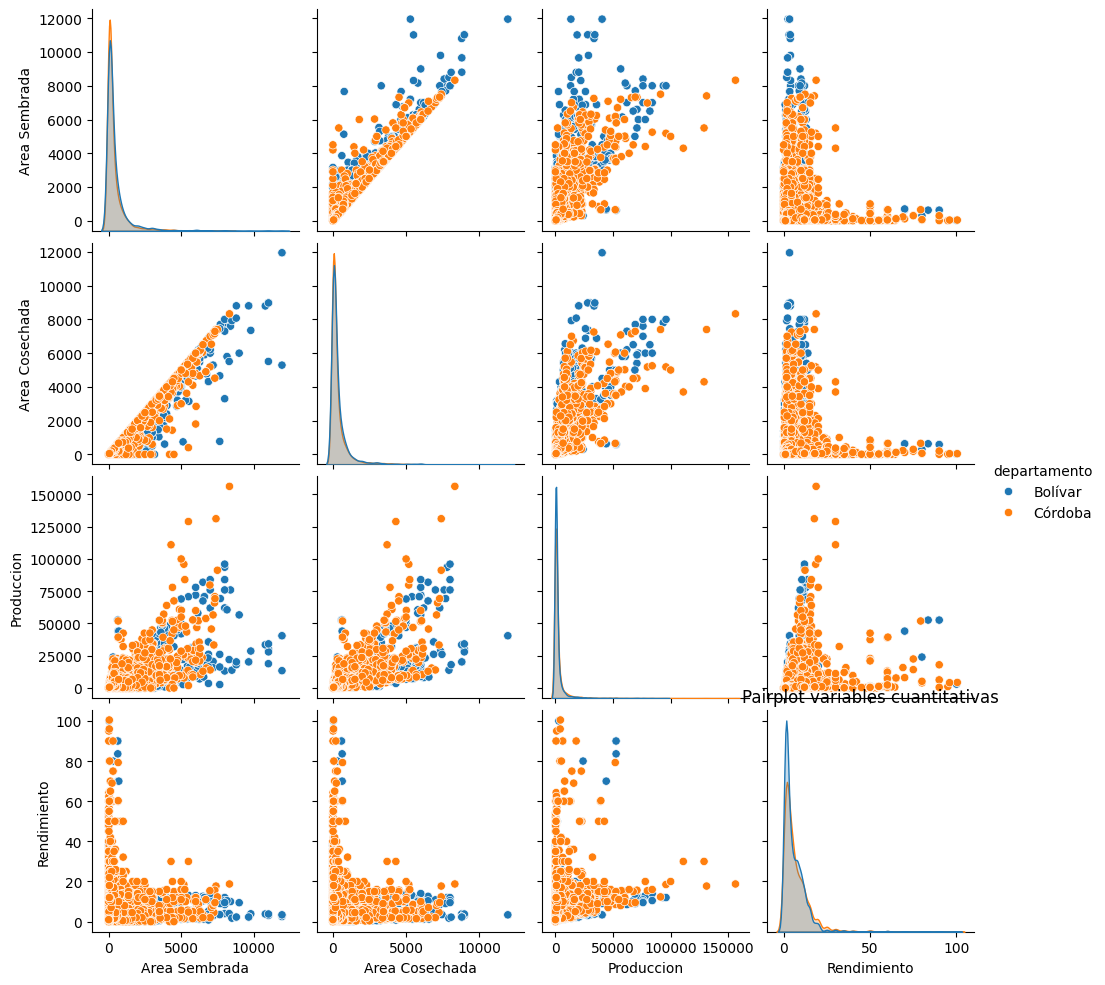

In [120]:
plt.figure(figsize=(15, 15))
qVar = df.select_dtypes(include='number').columns

pairplot = sns.pairplot(df, vars= qVar, hue='departamento')
plt.title('Pairplot variables cuantitativas')

# Modificar las etiquetas de los ejes
formattedLabels = [col.replace('_', ' ').title() for col in qVar]

for ax in pairplot.axes.flat:
    if ax is not None:
        if ax.get_xlabel() in qVar:
            ax.set_xlabel(formattedLabels[qVar.get_loc(ax.get_xlabel())])
        if ax.get_ylabel() in qVar:
            ax.set_ylabel(formattedLabels[qVar.get_loc(ax.get_ylabel())])

plt.tight_layout
plt.show()

## Gráficos departamentales

### Promedio anual de las variables por departamento

In [121]:
meanDpto = df.groupby(['departamento','año'])[qVar].mean().reset_index()
meanDpto.columns = meanDpto.columns.str.replace('_', ' ').str.title()

In [122]:
meanDpto.dtypes

Departamento       object
Año                 int64
Area Sembrada     float64
Area Cosechada    float64
Produccion        float64
Rendimiento       float64
dtype: object

In [123]:
qVar

Index(['area_sembrada', 'area_cosechada', 'produccion', 'rendimiento'], dtype='object')

In [124]:
qCol = ['Area Sembrada', 'Area Cosechada', 'Produccion', 'Rendimiento']
qCol

['Area Sembrada', 'Area Cosechada', 'Produccion', 'Rendimiento']

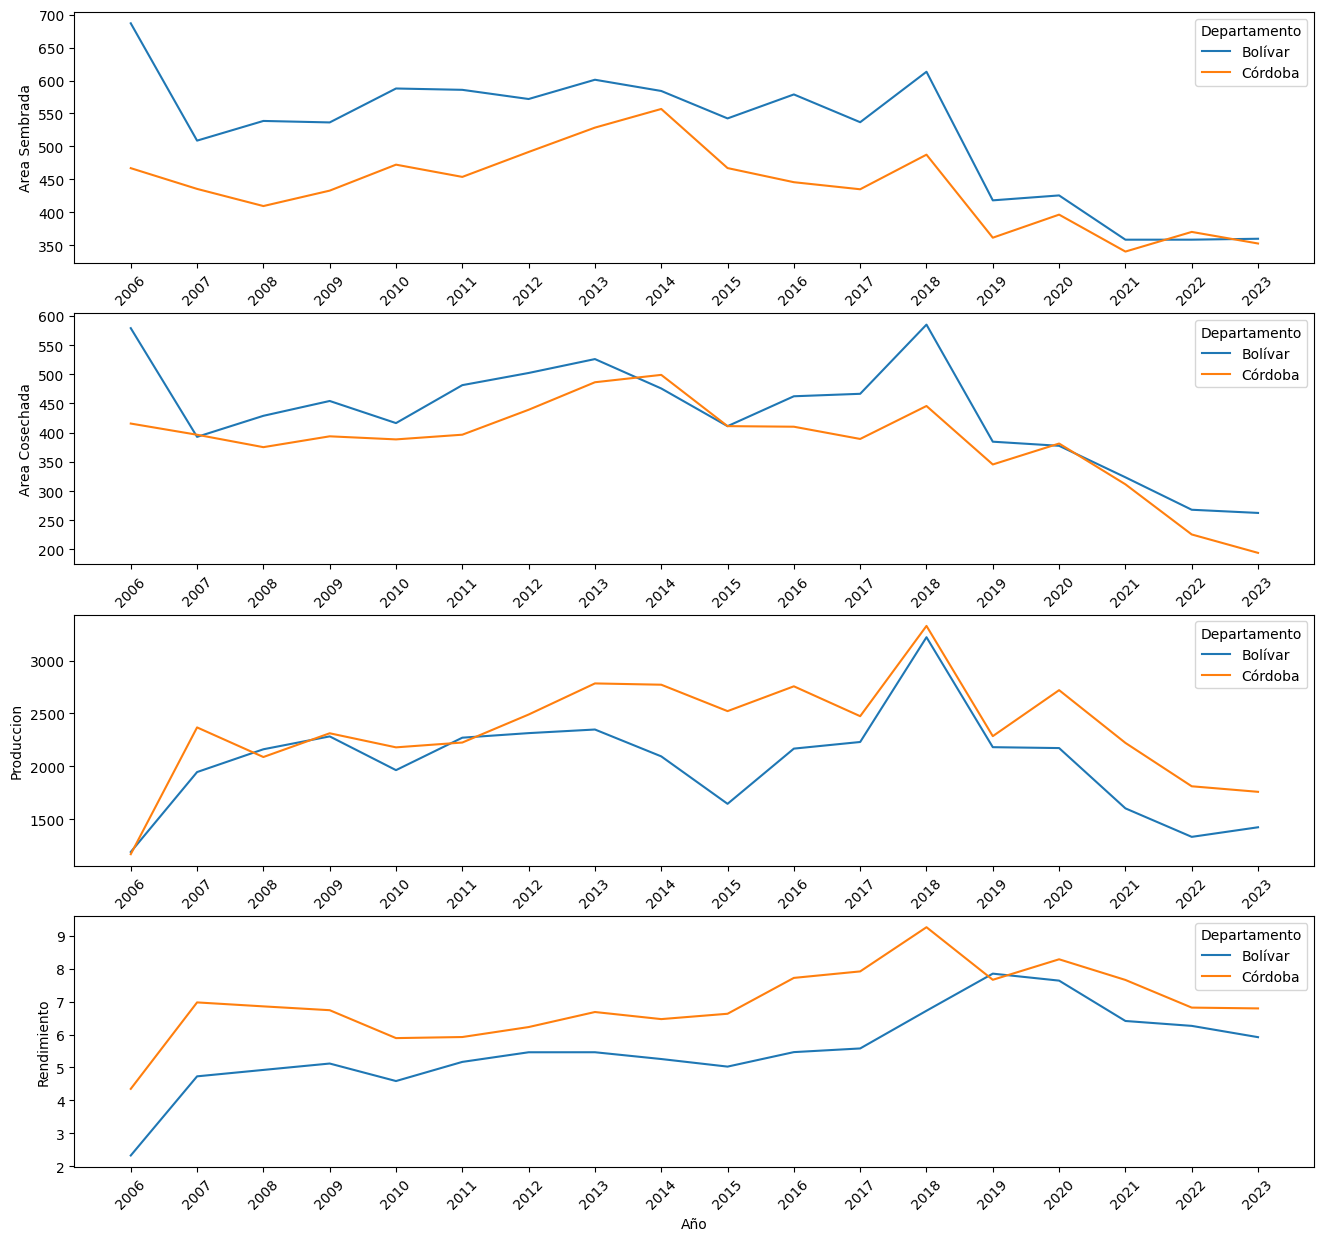

In [125]:
plt.figure(figsize=(16, 15))
for i, var in enumerate(qCol, 1):
    plt.subplot(4, 1, i)
    sns.lineplot(data=meanDpto, x='Año', y=var, hue='Departamento')
    plt.xlabel("Año")
    plt.xticks(ticks=meanDpto['Año'].unique(), labels=meanDpto['Año'].unique(), rotation=45)


In [184]:
meanDpto = df.groupby(['departamento','año'])[qVar].mean().reset_index()
etiquetasY= qVar.str.replace('_', ' ').str.title()
etiquetasY

Index(['Area Sembrada', 'Area Cosechada', 'Produccion', 'Rendimiento'], dtype='object')

In [162]:
print(list(enumerate(qVar)))

[(0, 'area_sembrada'), (1, 'area_cosechada'), (2, 'produccion'), (3, 'rendimiento')]


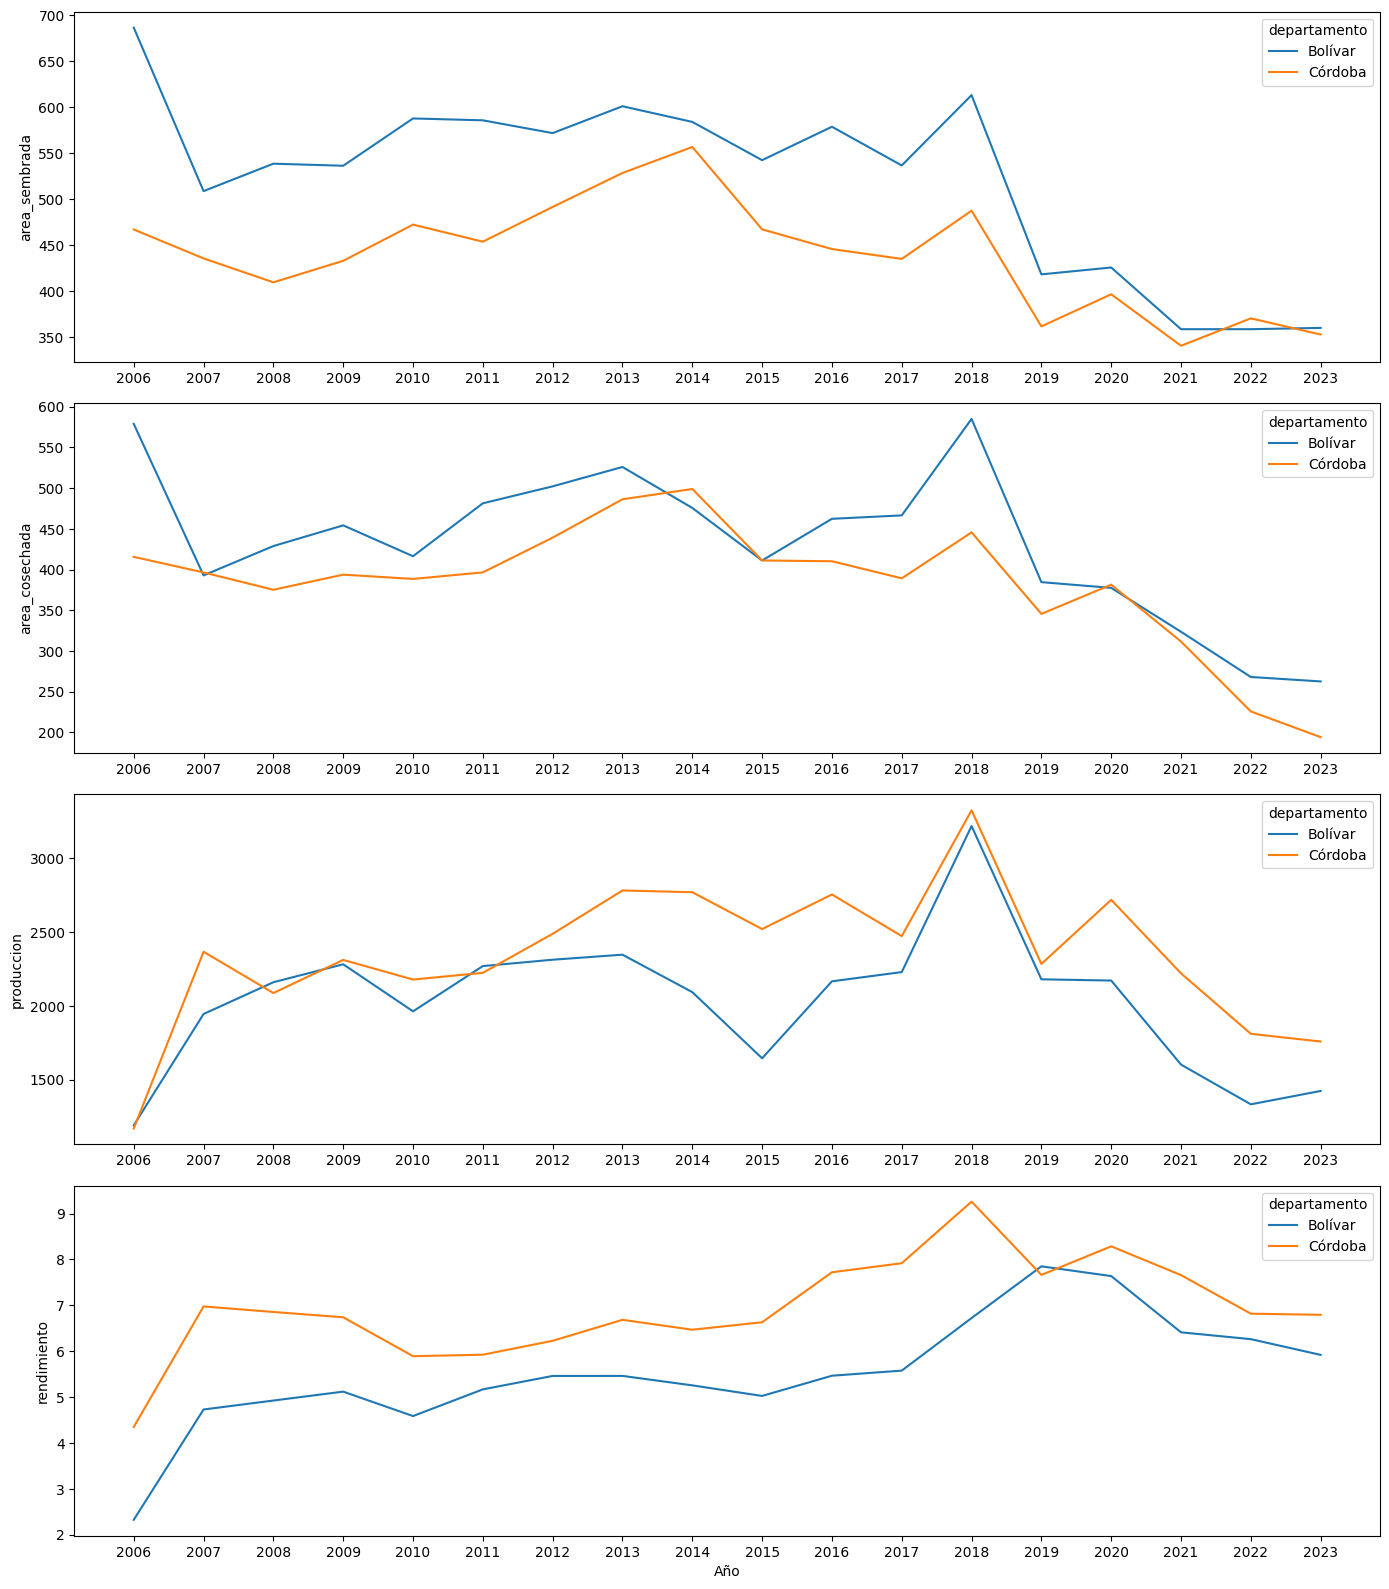

In [ ]:
plt.figure(figsize=(14,16))
for i,var in enumerate(qVar,1):
   plt.subplot(4,1,i)     # plt.subplot(nrows, ncols, index); index comienza en 1 por lo tanto enumerate debe comenzar en 1
   sns.lineplot(meanDpto, x='año', y=var, hue='departamento')
   plt.xticks(meanDpto['año'].unique())
   plt.xlabel('')
   plt.ylabel(etiquetasX)

plt.xlabel('Año')
plt.tight_layout()
plt.show()
   

### Top 3 municipios más productivos por departamento

In [126]:
produccionMpio = df.groupby(['departamento','municipio'])['produccion'].sum().sort_values(ascending=False).reset_index()
top3Mun = produccionMpio.groupby('departamento').apply(lambda x: x.nlargest(3, 'produccion'), include_groups=False).reset_index()
top3Mun

,departamento,level_1,municipio,produccion
0,Bolívar,1,El Carmen De Bolívar,2306340.83
1,Bolívar,3,San Juan Nepomuceno,1363365.50
2,Bolívar,5,Mahates,1313762.95
3,Córdoba,0,Tierralta,2314281.31
4,Córdoba,2,Ciénaga De Oro,1879774.68
5,Córdoba,4,Montería,1318976.50


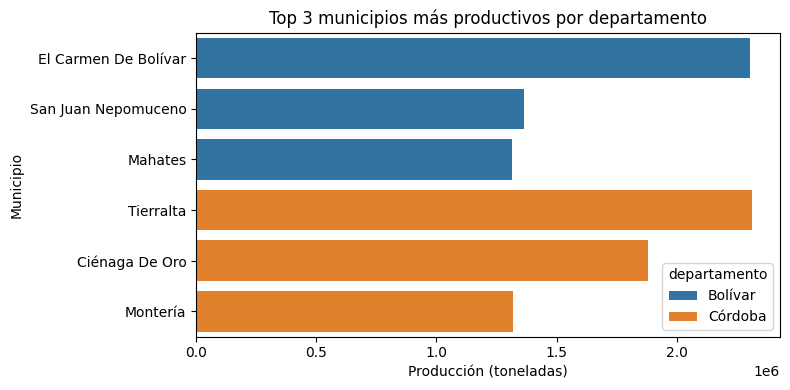

In [127]:
plt.figure(figsize=(8,4))
sns.barplot(top3Mun, x='produccion', y='municipio', hue='departamento')
plt.xlabel('Producción (toneladas)')
plt.ylabel('Municipio')
plt.title('Top 3 municipios más productivos por departamento')
plt.tight_layout()
plt.show()

### Distibución del ciclo de cultivo por departamento

In [128]:
cicloDpto = df.groupby(['departamento', 'ciclo_cultivo']).size().reset_index(name='cuenta')

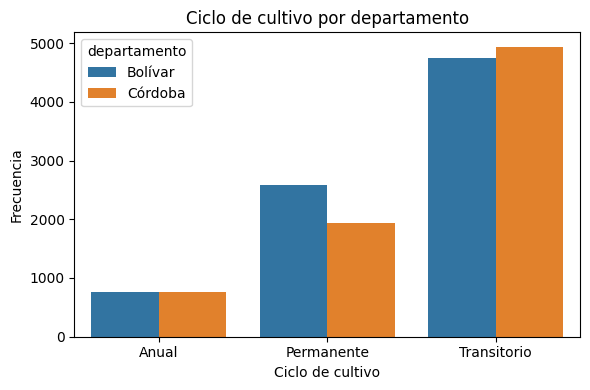

In [129]:
plt.figure(figsize=(6,4))
sns.barplot(cicloDpto, x='ciclo_cultivo', y='cuenta', hue='departamento')
plt.xlabel('Ciclo de cultivo')
plt.ylabel('Frecuencia')
plt.title('Ciclo de cultivo por departamento')
plt.tight_layout()
plt.show()

### Top 5 cultivos de mayor Producción y rendimiento anual promedio

In [130]:
# Obtener la producción y rendimiento promedio por cultivo
meanCultivo = df.groupby('cultivo')[['produccion', 'rendimiento']].mean().reset_index()

# Obtener los 5 cultivos de mayor producción/rendimiento
PmeanCultivo = meanCultivo.nlargest(5, 'produccion')
RmeanCultivo = meanCultivo.nlargest(5, 'rendimiento')

In [131]:
# Obtener la producción y rendimiento promedio anual por cultivo
cultivoAnual = df.groupby(['cultivo', 'año'])[['produccion', 'rendimiento']].mean().reset_index()

# Extraer sólo los 5 cultivos de mayor producción/rendimiento
avgAnnualProduction = cultivoAnual.merge(PmeanCultivo['cultivo'], on='cultivo', how='right')
avgAnnualYield = cultivoAnual.merge(RmeanCultivo['cultivo'], on='cultivo', how='right')

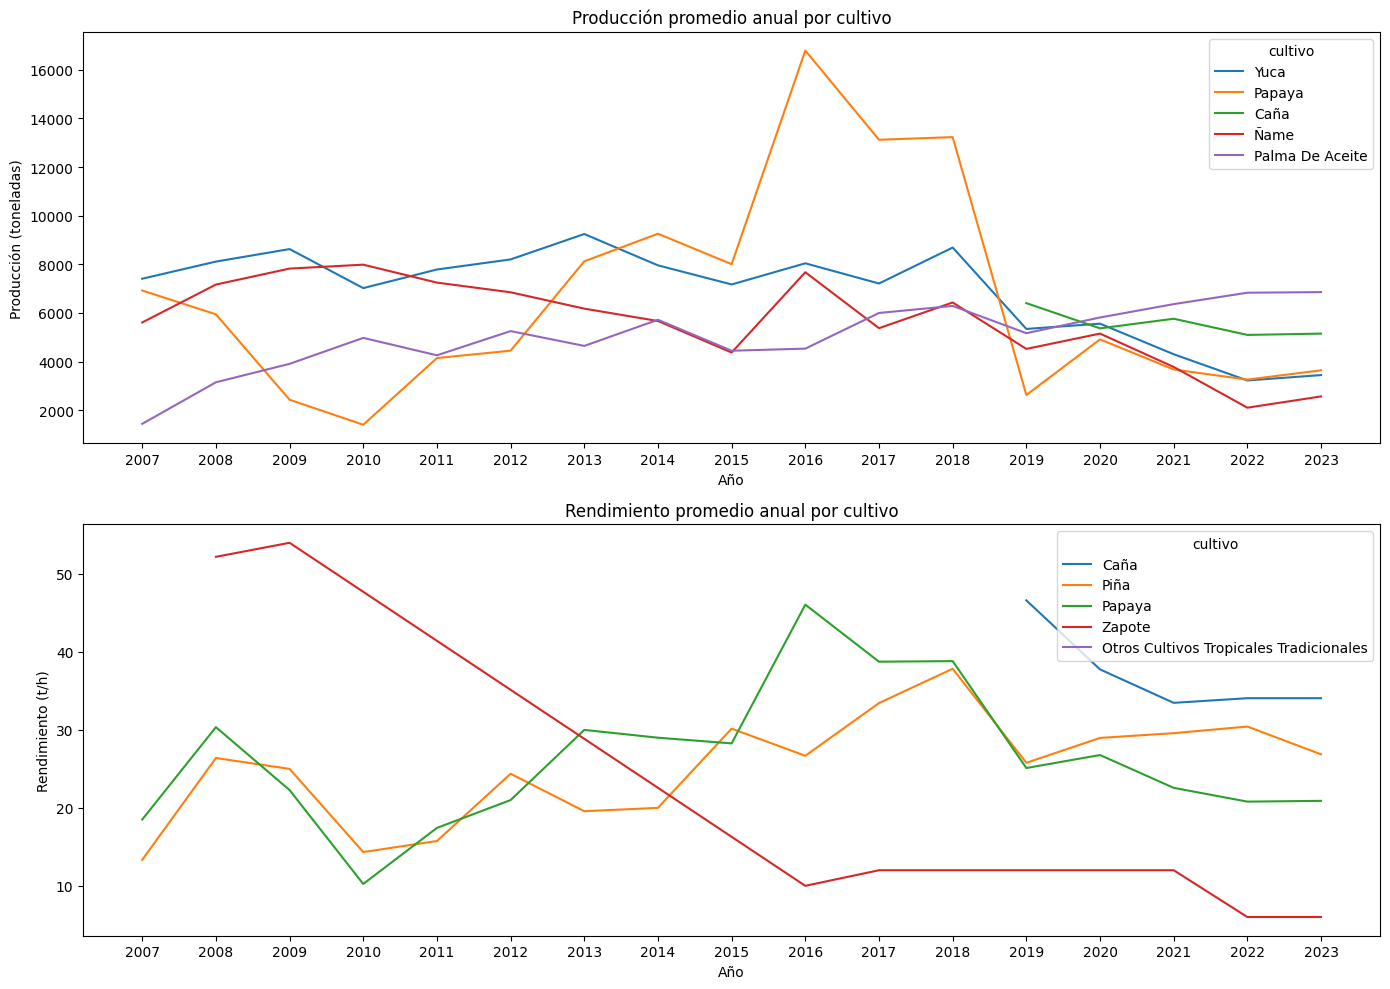

In [132]:
# Crear una figura con dos subplots verticales
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Producción
sns.lineplot(avgAnnualProduction, x='año', y='produccion', hue='cultivo', ax= axes[0])
axes[0].set_xticks(avgAnnualProduction['año'].unique())
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Producción (toneladas)')
axes[0].set_title('Producción promedio anual por cultivo')

# Rendimiento
sns.lineplot(avgAnnualYield, x='año', y='rendimiento', hue='cultivo', ax= axes[1])
axes[1].set_xticks(avgAnnualYield['año'].unique())
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Rendimiento (t/h)')
axes[1].set_title('Rendimiento promedio anual por cultivo')

plt.tight_layout()
plt.show()

### Top 10 cultivos por rendimiento

In [133]:
avgYield = df.groupby(['cultivo', 'ciclo_cultivo'])['rendimiento'].mean().reset_index()
avgYield10 =  avgYield.nlargest(10, 'rendimiento')

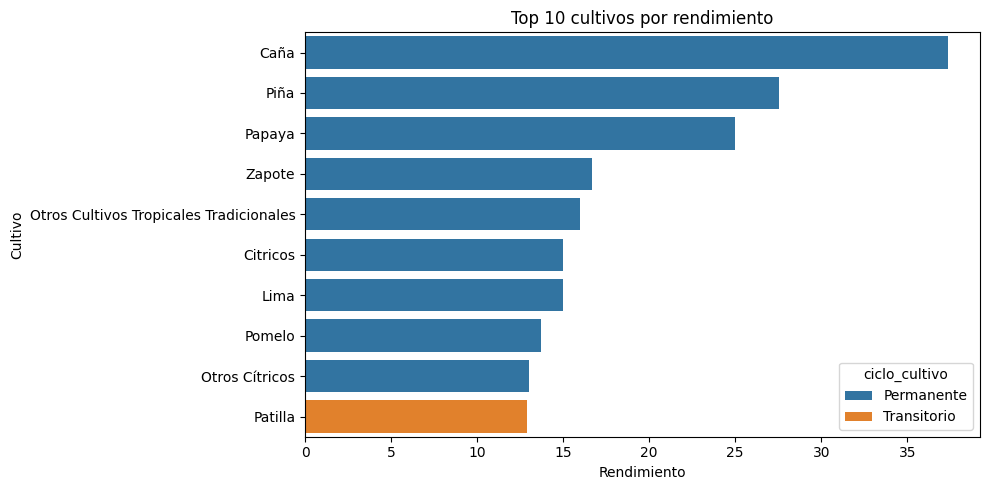

In [134]:
plt.figure(figsize=(10,5))
sns.barplot(avgYield10, x='rendimiento', y='cultivo', hue='ciclo_cultivo')
plt.xlabel('Rendimiento')
plt.ylabel('Cultivo')
plt.title('Top 10 cultivos por rendimiento')
plt.tight_layout()
plt.show()

### Top 10 departamental de cultivos por producción

In [135]:
avgProduction = df.groupby(['departamento', 'cultivo'])['produccion'].mean().reset_index()

In [136]:
avgProduction10 = avgProduction.groupby('departamento').apply(lambda x: x.nlargest(10, 'produccion'), include_groups= False).reset_index()

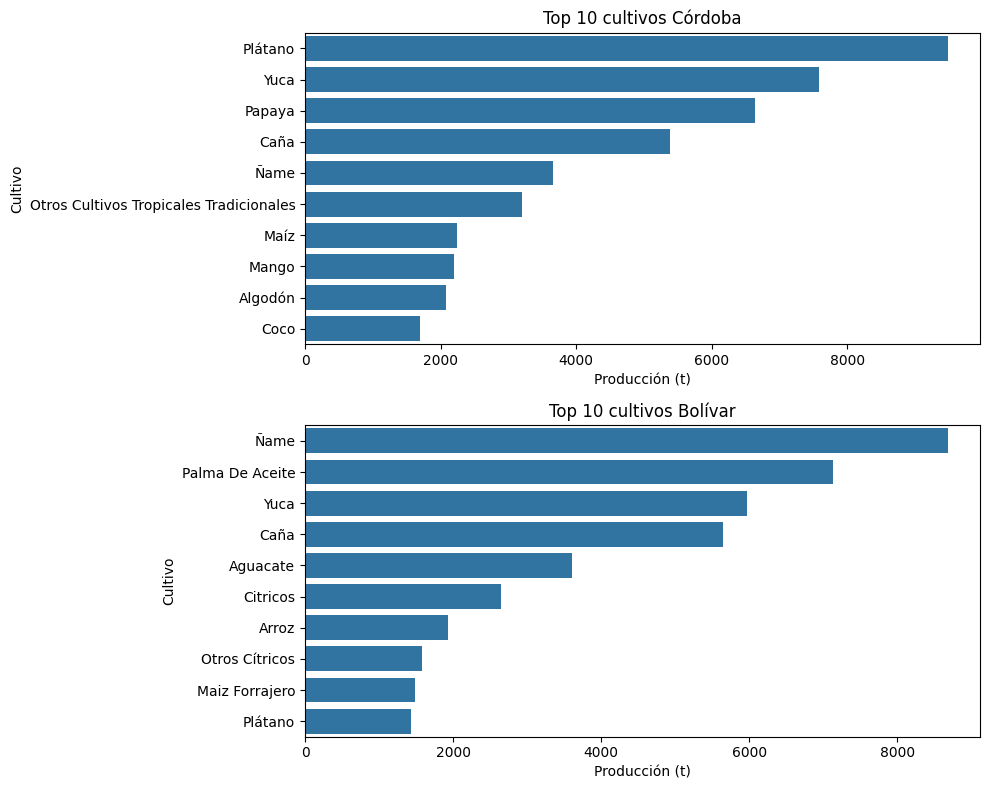

In [137]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Córdoba
sns.barplot(avgProduction10[avgProduction10['departamento'] == 'Córdoba'], x='produccion', y='cultivo', ax = axes[0])
axes[0].set_xlabel('Producción (t)')
axes[0].set_ylabel('Cultivo')
axes[0].set_title('Top 10 cultivos Córdoba')

sns.barplot(avgProduction10[avgProduction10['departamento'] == 'Bolívar'], x='produccion', y='cultivo', ax = axes[1])
axes[1].set_xlabel('Producción (t)')
axes[1].set_ylabel('Cultivo')
axes[1].set_title('Top 10 cultivos Bolívar')

plt.tight_layout()
plt.show()

### Promedio departamental de area sembrada por subregión

In [142]:
aSembradaSub = df.groupby(['departamento','subregion', 'año'])['area_sembrada'].mean().reset_index()

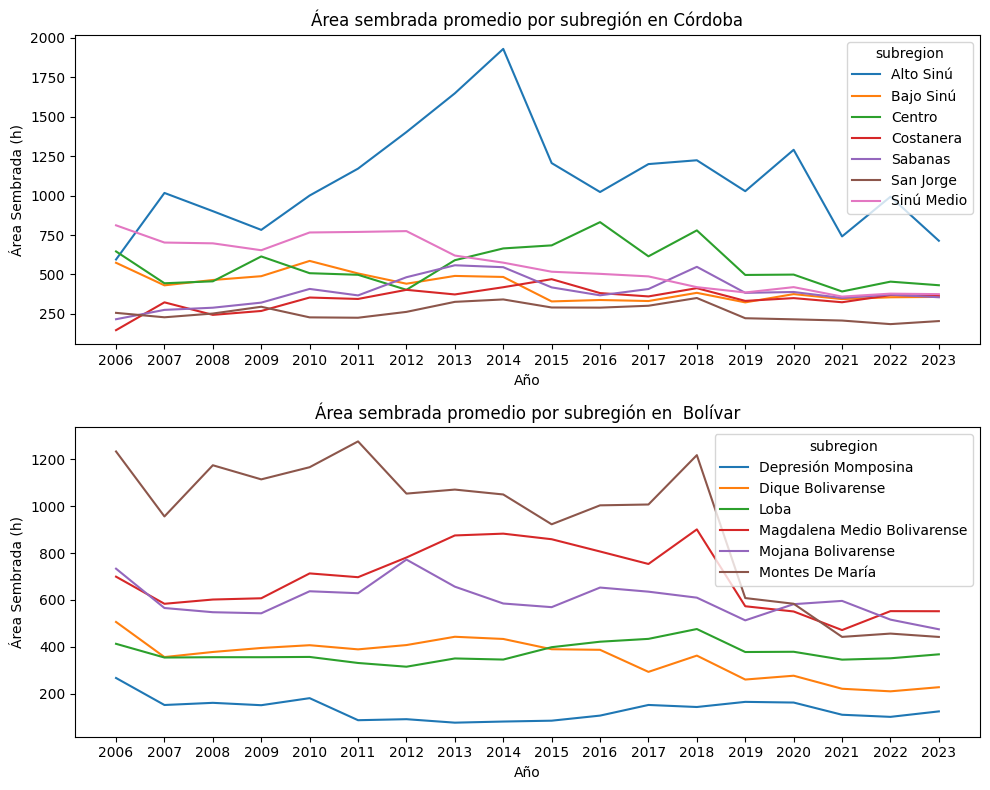

In [145]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Córdoba
sns.lineplot(aSembradaSub[aSembradaSub['departamento'] == 'Córdoba'], x='año', y='area_sembrada', hue='subregion', ax = axes[0])
axes[0].set_xticks(aSembradaSub['año'].unique())
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Área Sembrada (h)')
axes[0].set_title('Área sembrada promedio por subregión en Córdoba')

sns.lineplot(aSembradaSub[aSembradaSub['departamento'] == 'Bolívar'], x='año', y='area_sembrada', hue='subregion', ax = axes[1])
axes[1].set_xticks(aSembradaSub['año'].unique())
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Área Sembrada (h)')
axes[1].set_title('Área sembrada promedio por subregión en  Bolívar')

plt.tight_layout()
plt.show()